# Astro 283 Homework 3
Bijan Pourhamzeh

To find the marginal distribution for the flux of the star, we want to calculate $P\left(F\,|\,\{D_{x,y}\}\right)$.

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from astropy.io import fits

In [29]:
starfile = fits.open('hw3prob1-data.fits')
stardata = starfile[0].data

256

In [20]:
starfile[0].header[:]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  256                                                  
NAXIS2  =                  256                                                  
EXTEND  =                    T                                                  

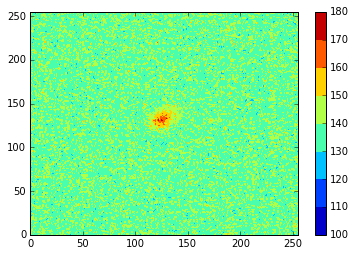

In [17]:
plt.contourf(stardata)
plt.colorbar()

In [48]:
def gaussian_f(z,sig,x0,y0,A,H):
    return A*np.exp(-1/(2*sig**2)*((z[0]-x0)**2+(z[1]-y0)**2)) + H

def residuals(parms, data):
    #Takes in a 5-tuple of parameters and an ND array of data points
    #Returns the difference between the data and model divided by the
    #standard deviation, which in this case is just the data
    return [(1 - gaussian_f(i,j,parms[0],parms[1],parms[2],parms[3],parms[4])/data[i,j])
                for i in range(0,len(stardata)) for j in range(0,len(stardata))]

In [41]:
initial = np.array([25.,125.,125.,180.,100.])
solution = opt.leastsq(residuals, initial, args = (stardata,))
print(solution[0])
print(solution[1])

[   7.13687881  132.49673224  126.03738386   26.0747831   132.67802256]
1


In [61]:
x_vals = np.linspace(0,255,256)
y_vals = np.linspace(0,255,256)
x_vals,y_vals = np.meshgrid(x_vals,y_vals)
initial = (25.,125.,125.,180.,100.)
popt, pcov = opt.curve_fit(gaussian_f, (x_vals.ravel(),y_vals.ravel()), stardata.ravel(), p0=initial)

TypeError: Input z must be a 2D array.

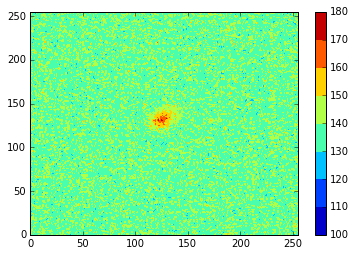

In [72]:
plt.contourf(stardata)
plt.colorbar()
plt.contour(x_vals,y_vals,gaussian_f((x_vals,y_vals),popt[0],popt[1],popt[2],popt[3],popt[4]), colors='black')
plt.axis([100,150,100,160])

In [71]:
x_vals.shape

(256, 256)